## MSDS-593: Lab 4
### Jacek Plonowski

## Matplotlib-Customize Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline
%config InlineBcakend.figure_format='retina'

In [2]:
! ls ../notebooks/data/

cars.csv	happy-2016.csv		       organdonation.csv
happy-2015.csv	kaggle-uber-other-federal.csv


In [3]:
path = '../notebooks/data/'
df_cars = pd.read_csv(path +'cars.csv')
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [4]:
# Get average miles per gallon for each car with the same number of cylinders
avg_mpg = df_cars.groupby('CYL').mean()['MPG']
avg_wgt = df_cars.groupby('CYL').mean()['WGT'] # do the same for average weight

# Get average miles per gallon for each car with the same weight
avg_mpg_per_wgt = df_cars.groupby('WGT').mean()['MPG']

# Get the unique list of cylinders in numerical order
cyl = sorted(df_cars['CYL'].unique())

# Get a list of all mpg values for three specific cylinder sizes
cyl4 = df_cars[df_cars['CYL']==4]['MPG'].values
cyl6 = df_cars[df_cars['CYL']==6]['MPG'].values
cyl8 = df_cars[df_cars['CYL']==8]['MPG'].values

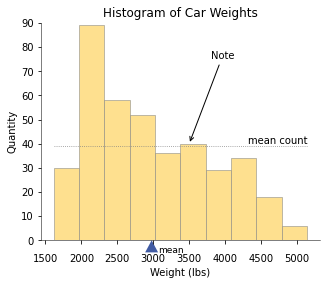

In [5]:
fig, ax = plt.subplots(figsize=(5,4))
wgt = df_cars['WGT']
n, bins, hpatches = ax.hist(df_cars['WGT'], color='#FEE08F')

ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Quantity")
ax.set_title("Histogram of Car Weights")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5) #can save on boilerplate by writing function for formatting
    
for rect in hpatches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

# find ing the mean x and mean y values
mx = wgt.mean()
my = n.mean()

# plotting mean horizontal line
ax.plot([min(wgt), max(wgt)], [my, my],
        ':',
        lw=0.8,
        c='grey')
# add a label to the mean hline
ax.text(max(wgt), my+1, "mean count", horizontalalignment='right')

# adding an annotation with an accompanying arrow
ax.annotate('Note',
            xy=(3500,n[5]), xytext=(3800, n[5]+35),
            arrowprops=dict(color='black', arrowstyle='->'))

# adding a wedge to the plot
tri = np.array([(mx, 0), (mx+90, -5), (mx-90, -5)])
wedge = patches.Polygon(tri, closed=True, facecolor='#415BA3')
wedge.set_clip_on(False)
ax.add_patch(wedge)

# formatting to get the wedge to appear correctly
ax.text(mx+90,-5,'mean',fontsize='9')
ax.tick_params(axis='x',which='major', pad=10)
ax.set_ylim(0,90)

plt.show()

## Exercise 1

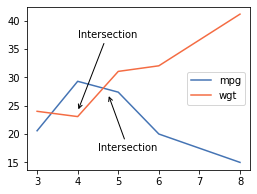

In [6]:
fig, ax = plt.subplots(figsize=(4,3))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     c='#4574B4', label="mpg") # Those are 6-digit hexadecimal numbers for red-green-blue
ax.plot(cyl, avg_wgt/100, c='#F46C43', label="wgt")

ax.annotate('Intersection', xy=(4,24), xytext=(4,22+15),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('Intersection', xy=(4.75,27), xytext=(4+0.5,22-5),
            arrowprops=dict(arrowstyle='->'))


plt.legend(loc=5)
plt.show()

## Patches (shapes)

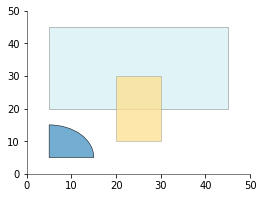

In [7]:
fig, ax = plt.subplots(figsize=(4,3))

# have to manually define the plot size so that the rectangle is in view
ax.set_xlim(0,50)
ax.set_ylim(0,50)

rect = patches.Rectangle(xy=(5,20), width=40, height=25,
                         facecolor='#E0F4F7', linewidth=.5, edgecolor="grey")
ax.add_patch(rect)

# the placement order onto the plot is defined by the order the patches are defined/added
rect = patches.Rectangle(xy=(20,10), width=10, height=20, alpha=.75,
                         facecolor='#FEE08F', linewidth=.5, edgecolor="grey")
ax.add_patch(rect)

# black outline is used here rather than gray to enclose the dark color infill
wedge = patches.Wedge(center=(5,5), r=10, theta1=0, theta2=90,
                      facecolor='#73ADD2', linewidth=.5, edgecolor="black")
ax.add_patch(wedge)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

plt.show()

## Exercise 2

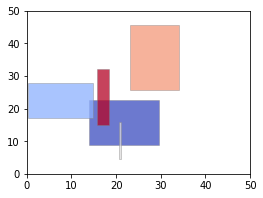

In [8]:
fig, ax = plt.subplots(figsize=(4,3))

size = 50
ax.set_xlim(0,size)
ax.set_ylim(0,size)
n = 5
xy = np.random.rand(n,2) * size
w = np.random.rand(n) * size/2
h = np.random.rand(n) * size/2

cmap = plt.get_cmap('coolwarm')
colors=cmap(np.linspace(0,1,num=n)) # get n colors

for i in range(n):

    rect = patches.Rectangle(xy=(xy[i]), width=w[i], height=h[i], alpha=0.75,
                         facecolor=colors[i], linewidth=.5, edgecolor="grey")

    ax.add_patch(rect)

plt.show()

## Strip Plots

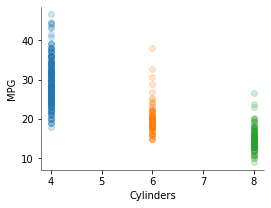

In [9]:
fig, ax = plt.subplots(figsize=(4,3))

# grouping by cylinder
n4 = len(cyl4)
n6 = len(cyl6)
n8 = len(cyl8)

# plotting mpg all at their corresponding cylinder number
# adding alpha to show where points are concentrated (more staurated color there)
ax.scatter([4]*n4, cyl4, alpha=.2)
ax.scatter([6]*n6, cyl6, alpha=.2)
ax.scatter([8]*n8, cyl8, alpha=.2)

ax.set_xlabel("Cylinders")
ax.set_ylabel("MPG")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

plt.show()

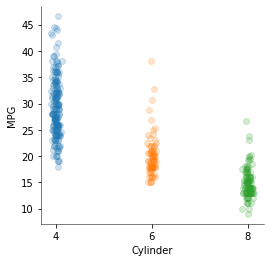

In [10]:
mu = 0
sigma = 0.05
fig, ax = plt.subplots(figsize=(4,4))

n4 = len(cyl4)
n6 = len(cyl6)
n8 = len(cyl8)

# adding amount of noise that matches the quantity of cyl values
x_noise4 = np.random.normal(mu, sigma, size=n4)
x_noise6 = np.random.normal(mu, sigma, size=n6)
x_noise8 = np.random.normal(mu, sigma, size=n8)

ax.scatter(4+x_noise4, cyl4, alpha=0.2)
ax.scatter(6+x_noise6, cyl6, alpha=0.2)
ax.scatter(8+x_noise8, cyl8, alpha=0.2)

ax.set_xticks([4,6,8])
ax.set_xlabel('Cylinder')
ax.set_ylabel('MPG')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

## Exercise 3

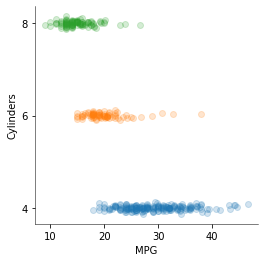

In [11]:
mu = 0
sigma = 0.05
fig,ax = plt.subplots(figsize=(4,4))

n4 = len(cyl4)
n6 = len(cyl6)
n8 = len(cyl8)

# adding amount of noise that matches the quantity of cyl values
y_noise4 = np.random.normal(mu, sigma, size=n4)
y_noise6 = np.random.normal(mu, sigma, size=n6)
y_noise8 = np.random.normal(mu, sigma, size=n8)

ax.scatter(cyl4, 4+y_noise4, alpha=0.2)
ax.scatter(cyl6, 6+y_noise6, alpha=0.2)
ax.scatter(cyl8, 8+y_noise8, alpha=0.2)

ax.set_yticks([4,6,8])
ax.set_xlabel('MPG')
ax.set_ylabel('Cylinders')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

## Pandas Intro Notebook

In [12]:
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [13]:
a = 34
b = 'hi'

type(a), type(b), a.__class__, b.__class__, a.__class__.__name__, b.__class__.__name__

(int, str, int, str, 'int', 'str')

In [14]:
type(np.array([1,2,3]))

numpy.ndarray

In [15]:
type(df_cars)

pandas.core.frame.DataFrame

In [16]:
df_cars.columns, type(df_cars.columns)

(Index(['MPG', 'CYL', 'ENG', 'WGT'], dtype='object'),
 pandas.core.indexes.base.Index)

In [17]:
df_cars['MPG'].dtype

dtype('float64')

In [18]:
df_uber = pd.DataFrame(pd.read_csv(path +'kaggle-uber-other-federal.csv'))
df_uber.head()

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,07/01/2014,07:15 AM,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,07/01/2014,07:30 AM,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,07/01/2014,08:00 AM,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned
3,07/01/2014,09:00 AM,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned
4,07/01/2014,09:30 AM,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned


In [19]:
print('Rows:', len(df_uber))

Rows: 99


In [20]:
# notice datatypes of columns as they were imported by default
# status should be categorical, dates should be datetime, etc...
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             99 non-null     object
 1   Time             99 non-null     object
 2   PU_Address       99 non-null     object
 3   DO_Address       98 non-null     object
 4   Routing Details  99 non-null     object
 5   PU_Address.1     99 non-null     object
 6   Status           99 non-null     object
dtypes: object(7)
memory usage: 5.5+ KB


In [21]:
# load in the data again, but this time pass in more arguments to have more accurate dtypes
df_uber = pd.DataFrame(pd.read_csv(path +'kaggle-uber-other-federal.csv',
                      parse_dates=['Date'], # pass in columns that have datetime data
                      dtype={'Status':'category'}))
df_uber.head(5)

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,2014-07-01,07:15 AM,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,2014-07-01,07:30 AM,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,2014-07-01,08:00 AM,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned
3,2014-07-01,09:00 AM,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned
4,2014-07-01,09:30 AM,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned


In [22]:
# process the ['Time'] column from object to datetime
df_uber['Time'] = pd.to_datetime(df_uber['Time'], format='%I:%M %p').dt.time
df_uber.head(5)

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,2014-07-01,07:15:00,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,2014-07-01,07:30:00,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,2014-07-01,08:00:00,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned
3,2014-07-01,09:00:00,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned
4,2014-07-01,09:30:00,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned


## Exercise 1

In [23]:
df_uber['Date']

0    2014-07-01
1    2014-07-01
2    2014-07-01
3    2014-07-01
4    2014-07-01
        ...    
94   2014-07-21
95   2014-07-21
96   2014-07-21
97   2014-07-21
98   2014-07-22
Name: Date, Length: 99, dtype: datetime64[ns]

In [24]:
df_uber['Status']

0     Cancelled
1       Arrived
2      Assigned
3      Assigned
4      Assigned
        ...    
94     Assigned
95    Cancelled
96      Arrived
97     Assigned
98      Arrived
Name: Status, Length: 99, dtype: category
Categories (3, object): ['Arrived', 'Assigned', 'Cancelled']

## Exercise 2

In [25]:
df_cars.columns

Index(['MPG', 'CYL', 'ENG', 'WGT'], dtype='object')

In [26]:
len(df_cars)

392

In [27]:
df_cars['WGT'].mean()

2977.5841836734694

In [28]:
df_cars['CYL'].median()

4.0

In [29]:
df_cars['ENG']/df_cars['CYL']

0      38.375
1      43.750
2      39.750
3      38.000
4      37.750
        ...  
387    35.000
388    24.250
389    33.750
390    30.000
391    29.750
Length: 392, dtype: float64

## Exercise 3

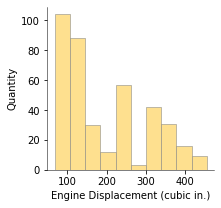

In [30]:
fig, ax = plt.subplots(figsize=(3,3))

n, bins, patch = ax.hist(df_cars['ENG'], color='#FEE08F')

hide = ['top','right']
show = ['bottom','left']

for i in hide:
    ax.spines[i].set_visible(False)
for i in show:
    ax.spines[i].set_linewidth(0.5)
for rect in patch:
    rect.set_linewidth(0.5)
    rect.set_edgecolor('grey')

ax.set_xlabel('Engine Displacement (cubic in.)')
ax.set_ylabel('Quantity')

plt.show()

## Exercise 4

In [31]:
years = []
for i in range(10):
    year = 1991 + i
    years.append(year)
years = pd.Series(years)
print(years)
print(type(years))

0    1991
1    1992
2    1993
3    1994
4    1995
5    1996
6    1997
7    1998
8    1999
9    2000
dtype: int64
<class 'pandas.core.series.Series'>


In [32]:
len(years)

10

In [33]:
years[years<1997]

0    1991
1    1992
2    1993
3    1994
4    1995
5    1996
dtype: int64

In [34]:
rain = pd.Series([12.09,12.35,12.51,10.25,10.18,10.59,10.26,10.48,8.67,10.23,9.53,10.48])
rain

0     12.09
1     12.35
2     12.51
3     10.25
4     10.18
5     10.59
6     10.26
7     10.48
8      8.67
9     10.23
10     9.53
11    10.48
dtype: float64

In [35]:
rain[rain<11].index.values

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])

In [36]:
rain = rain*0.20
rain

0     2.418
1     2.470
2     2.502
3     2.050
4     2.036
5     2.118
6     2.052
7     2.096
8     1.734
9     2.046
10    1.906
11    2.096
dtype: float64